In [99]:
####Analysis of Indian election data for 2009 and 2014

##Loading libraries

import sys
print("Python version:{}".format(sys.version))

import os

import numpy as np
print("Numpy version:{}".format(numpy.__version__))

import scipy
print("Scipy version:{}".format(scipy.__version__))

import matplotlib as plt
print("Matplotlib version:{}".format(matplotlib.__version__))

import pandas as pd
print("Pandas version:{}".format(pandas.__version__))

import sklearn
print("Pandas version :{}".format(sklearn.__version__))

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##Loading Datasets
print(os.getcwd())
os.chdir("/home/shaibal/Data Science/Projects/Indian Election Data")
print(os.getcwd())

candidate_2014_db = pandas.read_csv("LS2014Candidate.csv")

print(candidate_2014_db.head(10))

###Data analysis and evaluation
candidate_2014_db.describe()
candidate_2014_db.isnull().sum()
candidate_2014_db = candidate_2014_db.dropna()
print(candidate_2014_db.isnull().sum())
candidate_2014_db.shape
candidate_2014_db.info()

###Increase plot size

#Get current size
fig_size = plt.rcParams["figure.figsize"]

#Print current size
print("Current size", fig_size)

#Set figure width to 12 and size to 4
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

#Print new size
print("New size: ", fig_size)



Python version:3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Numpy version:1.15.4
Scipy version:1.1.0
Matplotlib version:3.0.2
Pandas version:0.23.4
Pandas version :0.20.1
/home/shaibal/Data Science/Projects/Indian Election Data
/home/shaibal/Data Science/Projects/Indian Election Data
  ST_CODE      State name  Month  Year  PC Number      PC name PC Type  \
0     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
1     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
2     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
3     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
4     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
5     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
6     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
7     S01  Andhra Pradesh      5  2014          1    Adilabad       ST   
8     S01  Andhra Pradesh      5  2014    

In [47]:
first_position_2014 = candidate_2014_db[candidate_2014_db.Position ==1]
party_list = first_position_2014['Party Abbreviation'].value_counts().head(6).to_dict()
sum_seats = sum(first_position_2014['Party Abbreviation'].value_counts().tolist())
print(sum_seats)
party_list['Other Parties'] = sum_seats - sum(first_position_2014['Party Abbreviation'].value_counts().head(6).tolist())
print(party_list)


543
{'BJP': 282, 'INC': 44, 'ADMK': 37, 'AITC': 34, 'BJD': 20, 'SHS': 18, 'Other Parties': 108}


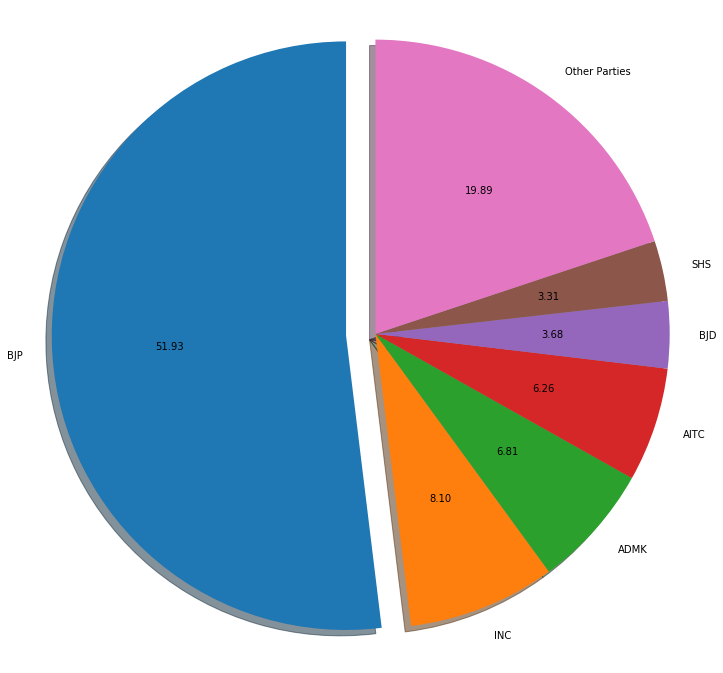

In [48]:

explode_tuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
figreObject, axesObject = plt.subplots()
axesObject.pie(party_list.values(), labels = party_list.keys(),
              autopct = '%1.2f',
              shadow = True,
              explode = explode_tuple,
              startangle = 90)

axesObject.axis('equal')
plt.show()

In [160]:
votes_polled = first_position_2014.groupby('Party Abbreviation')['Total Votes Polled'].sum().to_dict()
import collections
import operator
sorted_votes_polled = sorted(votes_polled.items(), key = operator.itemgetter(1))
sorted_votes_polled = collections.OrderedDict(sorted_votes_polled)
pd.DataFrame.from_dict(sorted_votes_polled,orient='index', columns = ['Total Votes Polled'])

,Total Votes Polled
SDF,163698
NPEP,239301
AINRC,255826
CPI,389209
RSP,408528
KEC(M),424194
PMK,468194
AIMIM,513868
JKPDP,533629
SWP,640428


In [149]:
###Increase plot size

#Get current size
fig_size = plt.rcParams["figure.figsize"]

#Print current size
print("Current size", fig_size)

#Set figure width to 12 and size to 4
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

#Print new size
print("New size: ", fig_size)

Current size [12.0, 12.0]
New size:  [20, 20]


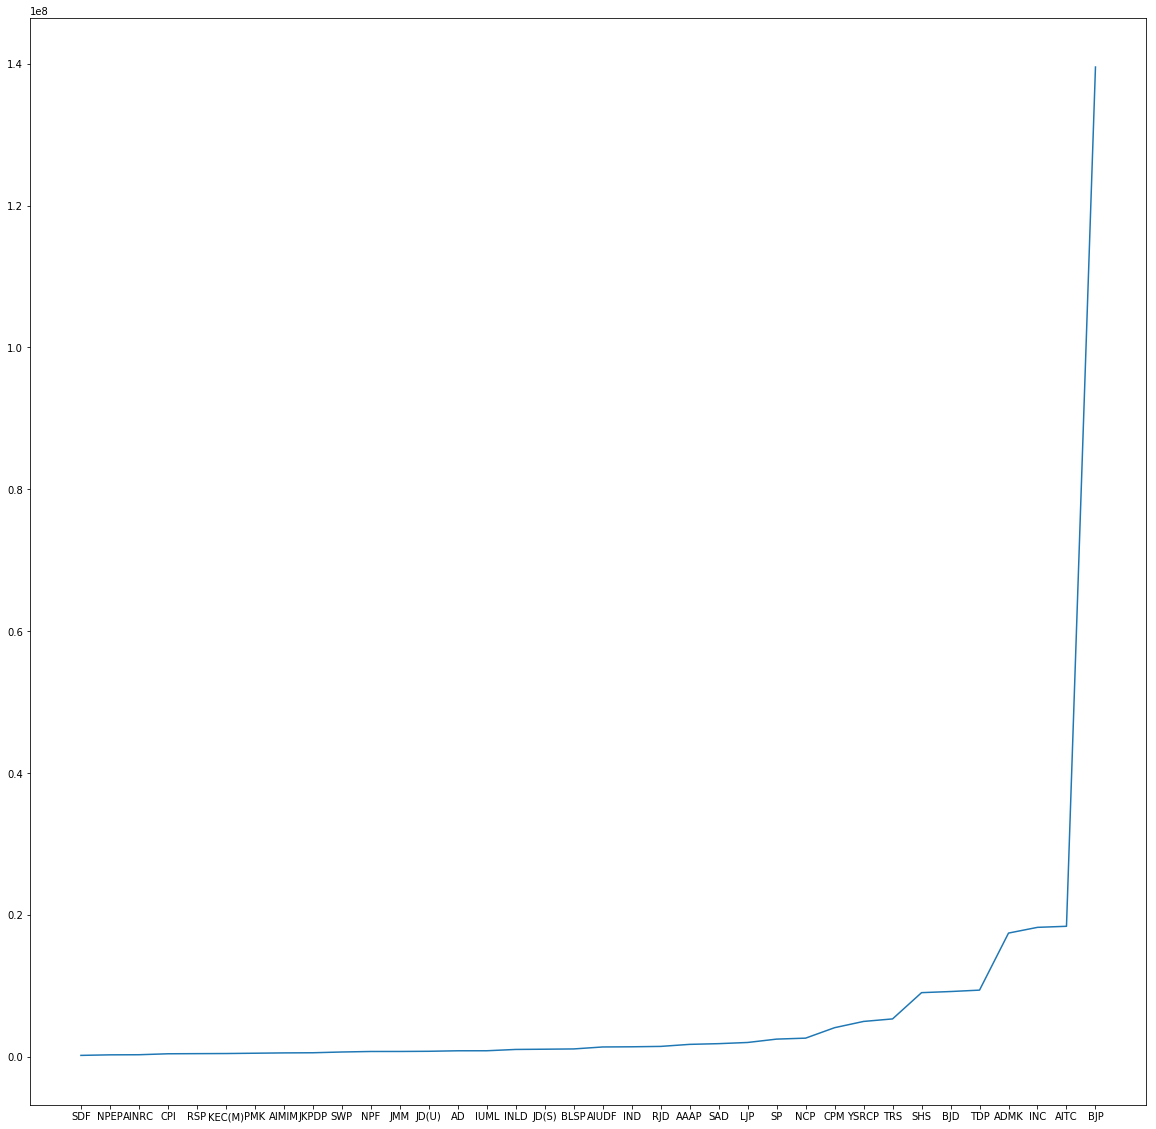

In [161]:
import matplotlib.pylab as pyl
pyl.plot(*zip(*sorted(sorted_votes_polled.items(), key=lambda x:x[1])))

In [164]:
candidate_2014_db['State name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [174]:
print(candidate_2014_db['PC name'].nunique())
type(candidate_2014_db)

540


pandas.core.frame.DataFrame

In [182]:
first_position_2014 = candidate_2014_db[candidate_2014_db.Position ==1]
second_position_2014 = candidate_2014_db[candidate_2014_db.Position == 2]
print(type(first_position_2014))
print(type(second_position_2014))
print(first_position_2014['PC name'].nunique())
print(second_position_2014['PC name'].nunique())
print(first_position_2014['Total Votes Polled'] - second_position_2014['Total Votes Polled'])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
540
540
0      NaN
1      NaN
9      NaN
10     NaN
27     NaN
28     NaN
45     NaN
46     NaN
62     NaN
63     NaN
73     NaN
74     NaN
87     NaN
88     NaN
118    NaN
119    NaN
149    NaN
150    NaN
166    NaN
167    NaN
182    NaN
183    NaN
192    NaN
193    NaN
199    NaN
200    NaN
209    NaN
210    NaN
223    NaN
224    NaN
        ..
8507   NaN
8508   NaN
8523   NaN
8524   NaN
8548   NaN
8549   NaN
8564   NaN
8565   NaN
8582   NaN
8583   NaN
8594   NaN
8595   NaN
8599   NaN
8600   NaN
8625   NaN
8626   NaN
8649   NaN
8650   NaN
8673   NaN
8674   NaN
8703   NaN
8704   NaN
8718   NaN
8719   NaN
8736   NaN
8737   NaN
8756   NaN
8757   NaN
8763   NaN
8764   NaN
Name: Total Votes Polled, Length: 1086, dtype: float64
